### macro mAP retrain vs BirdNET for different dataframes

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import average_precision_score

In [14]:
# Paths to the CSV files
true_labels_path = ('/mnt/e/retraining_BirdNET/model_test/input_ready/one-hot-encoded_validation.csv')
predictions_path = ('/mnt/e/retraining_BirdNET/model_test/results/1st_model/predicted_labels.csv')

In [15]:
# Load the DataFrames
true_labels_df = pd.read_csv(true_labels_path)
predictions_df = pd.read_csv(predictions_path)

In [16]:
# Extract label data, assuming columns are ordered and named the same beyond the first three columns
# The first three columns are assumed to be 'file', 'start_time', 'end_time' which are not part of the labels
true_labels = true_labels_df.iloc[:, 3:].values
predictions = predictions_df.iloc[:, 3:].values

In [17]:
# Calculate the macro mean average precision
macro_mAP = average_precision_score(true_labels, predictions, average='macro')

print(f'Macro Mean Average Precision: {macro_mAP}')

Macro Mean Average Precision: 0.48145668099923233


### Calculate precision-recall for each class and average precision over all classes

In [18]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
# Assuming you already have `true_labels` and `predictions` (e.g., probabilities or decision function output)
n_classes = true_labels.shape[1]  # This should match the number of classes


# For each class, calculate precision, recall, and average precision
precision = dict()
recall = dict()
average_precision = dict()

# Loop through each class
for i in range(n_classes):
    # Check if there are any positive samples for the current class
    precision[i], recall[i], _ = precision_recall_curve(true_labels[:, i], predictions[:, i])
    average_precision[i] = average_precision_score(true_labels[:, i], predictions[:, i])

# Calculate macro-average precision-recall
precision["macro"], recall["macro"], _ = precision_recall_curve(true_labels.ravel(), predictions.ravel())
average_precision["macro"] = average_precision_score(true_labels, predictions, average="macro")

### Plot macro mean average precision recall curve

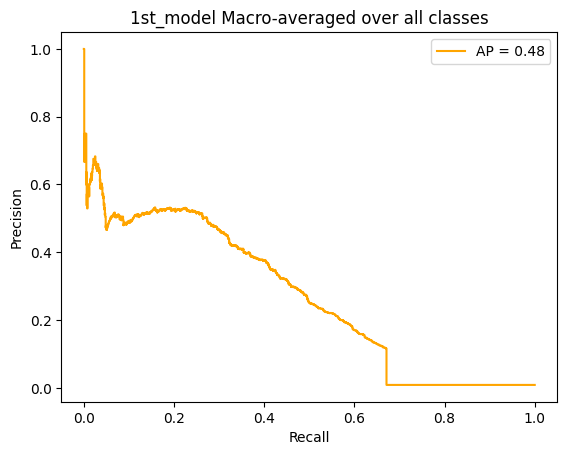

In [21]:
from collections import Counter
import matplotlib.pyplot as plt

# Plot the precision-recall curve using the macro-average
display = PrecisionRecallDisplay(
    recall=recall["macro"],
    precision=precision["macro"],
    average_precision=average_precision["macro"],
    prevalence_pos_label=Counter(true_labels.ravel())[1] / true_labels.size,
)

# Customize line color (e.g., set to red)
display.plot(plot_chance_level=False, color='orange')

# Move the legend inside the plot
plt.legend(loc="upper right")

plt.title("1st_model Macro-averaged over all classes")

# Save the plot as PNG or JPG
plt.savefig('/mnt/e/retraining_BirdNET/model_test/results/1st_model/1st_model_precision_recall_curve.png', format='png', dpi=300)  # PNG format
# plt.savefig('precision_recall_curve.jpg', format='jpg', dpi=300)  # JPG format

# Show the plot

plt.show()

### Plot average precision for specific classes

In [ ]:
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay


# Get the class names starting from column 4
class_names = true_labels_df.iloc[:, 3:].columns

class_names

### Owls not detected and generating too many false positives

In [ ]:
# Specify the class indices you want to plot
selected_class_names = ['Long-tufted Screech-Owl', 'Tawny-browed Owl', 'Buff-fronted Owl','Black-capped Screech-Owl']

# Get the corresponding indices for the selected class names
selected_classes = [list(class_names).index(class_name) for class_name in selected_class_names]

# Setup plot details
colors = cycle(["turquoise", "darkorange", "navy", "palevioletred"])

# Create the plot
_, ax = plt.subplots(figsize=(8, 8))

# Plot precision-recall curve for each selected class
for class_name, class_idx, color in zip(selected_class_names, selected_classes, colors):
    display = PrecisionRecallDisplay(
        recall=recall[class_idx],
        precision=precision[class_idx],
        average_precision=average_precision[class_idx],
    )
    display.plot(ax=ax, name=f"Precision-recall for {class_name}", color=color)

# Add title and legend


ax.set_title("Precision-Recall owls with bad performance 2nd_model_alternative")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))  # Adjust location to the right of the plot

# Adjust layout to make room for the legend
plt.tight_layout(rect=[1, 1, 0.75, 2]) 
# Save the plot as PNG or JPG
plt.savefig('/mnt/e/retraining_BirdNET/model_test/results/2nd_model_alternative/2nd_model_alternative_owls-bad-perf_precision_recall_curve.png', format='png', dpi=300, bbox_inches='tight')  # PNG format
# plt.savefig('precision_recall_curve.jpg', format='jpg', dpi=300)  # JPG format

# Show the plot


plt.show()

### Owls not detected on PAM subset of recordings

In [ ]:
# Specify the class indices you want to plot
selected_class_names = ['Mottled Owl_song', 'Black-banded Owl','Stygian Owl_call','Striped Owl_song', 'Stygian Owl_song']

# Get the corresponding indices for the selected class names
selected_classes = [list(class_names).index(class_name) for class_name in selected_class_names]

# Setup plot details
colors = cycle(["orchid", "olivedrab", "turquoise", "orange", "slateblue"])

# Create the plot
_, ax = plt.subplots(figsize=(8, 8))

# Plot precision-recall curve for each selected class
for class_name, class_idx, color in zip(selected_class_names, selected_classes, colors):
    display = PrecisionRecallDisplay(
        recall=recall[class_idx],
        precision=precision[class_idx],
        average_precision=average_precision[class_idx],
    )
    display.plot(ax=ax, name=f"Precision-recall for {class_name}", color=color)

# Add title and legend


ax.set_title("Precision-Recall curve not detected owls_1st model")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))  # Adjust location to the right of the plot

# Adjust layout to make room for the legend
plt.tight_layout(rect=[1, 1, 0.75, 2]) 
# Save the plot as PNG or JPG
plt.savefig('/mnt/e/retraining_BirdNET/model_test/results/1st_model/1st_model_not-detected_owls_precision_recall_curve.png', format='png', dpi=300, bbox_inches='tight')  # PNG format
# plt.savefig('precision_recall_curve.jpg', format='jpg', dpi=300)  # JPG format

# Show the plot


plt.show()

### Owls Performing well

In [ ]:
# Specify the class indices you want to plot
selected_class_names = ['Barn Owl','Tropical Screech-Owl','Striped Owl_call', 
                    'Mottled Owl_call','Rusty-barred Owl_call1','Burrowing Owl','Ferruginous Pygmy-Owl']

# Get the corresponding indices for the selected class names
selected_classes = [list(class_names).index(class_name) for class_name in selected_class_names]

# Setup plot details
colors = cycle(["darkseagreen", "lightsalmon", "lightseagreen", "plum", "gold", "lightsteelblue", "tan"])

# Create the plot
_, ax = plt.subplots(figsize=(8, 8))

# Plot precision-recall curve for each selected class
for class_name, class_idx, color in zip(selected_class_names, selected_classes, colors):
    display = PrecisionRecallDisplay(
        recall=recall[class_idx],
        precision=precision[class_idx],
        average_precision=average_precision[class_idx],
    )
    display.plot(ax=ax, name=f"Precision-recall for {class_name}", color=color)

# Add title and legend


ax.set_title("Precision-Recall curve detected owls_1st model")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))  # Adjust location to the right of the plot

# Adjust layout to make room for the legend
plt.tight_layout(rect=[1, 1, 0.75, 2]) 
# Save the plot as PNG or JPG
plt.savefig('/mnt/e/retraining_BirdNET/model_test/results/1st_model/1st_model_detected-owls_precision_recall_curve.png', format='png', dpi=300, bbox_inches='tight')  # PNG format
# plt.savefig('precision_recall_curve.jpg', format='jpg', dpi=300)  # JPG format

# Show the plot


plt.show()

In [ ]:
# Specify the class indices you want to plot
selected_class_names = ['Little Nightjar','Rufous Nightjar','Long-tailed Potoo',
                        'Ocellated Poorwill','Short-tailed Nighthawk', 'Common Potoo',
                         'Common Pauraque','Silky-tailed Nightjar']

# Get the corresponding indices for the selected class names
selected_classes = [list(class_names).index(class_name) for class_name in selected_class_names]

# Setup plot details
colors = cycle(["darkseagreen", "lightsalmon", "lightseagreen", "orchid", "gold", "lightsteelblue", "olive", "yellowgreen","paleturquoise"])

# Create the plot
_, ax = plt.subplots(figsize=(8, 8))

# Plot precision-recall curve for each selected class
for class_name, class_idx, color in zip(selected_class_names, selected_classes, colors):
    display = PrecisionRecallDisplay(
        recall=recall[class_idx],
        precision=precision[class_idx],
        average_precision=average_precision[class_idx],
    )
    display.plot(ax=ax, name=f"Precision-recall for {class_name}", color=color)

# Add title and legend


ax.set_title("Precision-Recall curve Caprimulgids_1st model")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))  # Adjust location to the right of the plot

# Adjust layout to make room for the legend
plt.tight_layout(rect=[1, 1, 0.75, 2]) 
# Save the plot as PNG or JPG
plt.savefig('/mnt/e/retraining_BirdNET/model_test/results/1st_model/1st_model_caprimulgids_precision_recall_curve.png', format='png', dpi=300, bbox_inches='tight')  # PNG format
# plt.savefig('precision_recall_curve.jpg', format='jpg', dpi=300)  # JPG format

# Show the plot


plt.show()